## Винные обзоры

+ country - страна-производитель вина
+ description - подробное описание
+ designation - название виноградника, где выращивают виноград для вина
+ points - количество баллов, которое WineEnthusiast оценил вино по шкале от 1 до 100
+ price - стоимость бутылки вина
+ province - провинция или штат 
+ region_1 - винодельческий район в провинции или штате (например, Напа)
+ region_2 - конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например, Резерфорд в долине Напа), но это значение иногда может быть пустым.
+ taster_name - имя дегустатора
+ taster_twitter_handle - твиттер дегустатора
+ title - название вина, который часто содержит годи др подробную информацию
+ variety -  сорт винограда, из которого изготовлено вино (например, Пино Нуар).
+ winery - винодельня, которая производила вино

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import sweetviz as sv
import dtale
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_path = join('dataset', 'wine.csv')
report_path = join('reports', 'ydata_profile.html')

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Задание 4.1
Сколько всего дегустаторов приняло участие в винных обзорах?

In [5]:
data.taster_name.nunique()

19

### Задание 4.2
Какова максимальная цена за бутылку в этом наборе данных? Введите целое число.

In [6]:
int(round(data.price.max(), 0))

3300

In [7]:
profile = ProfileReport(data, title="ProfileReport")

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_file(report_path)

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)


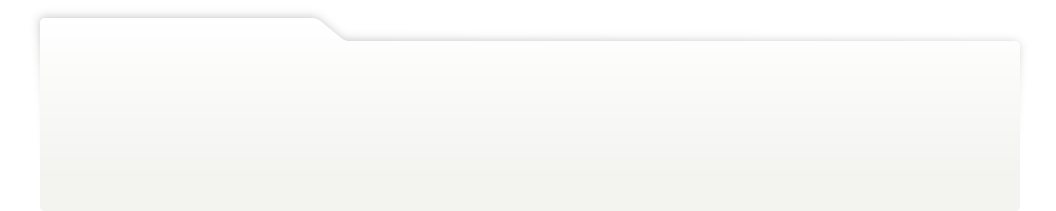
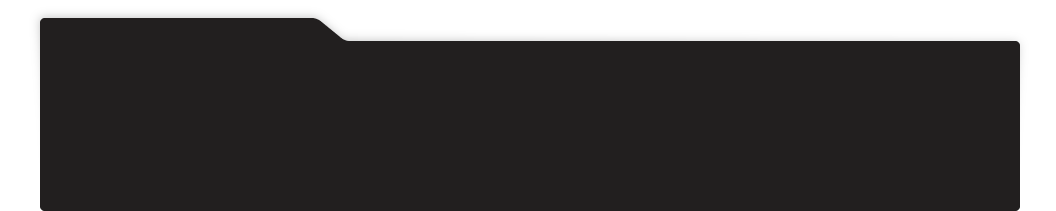
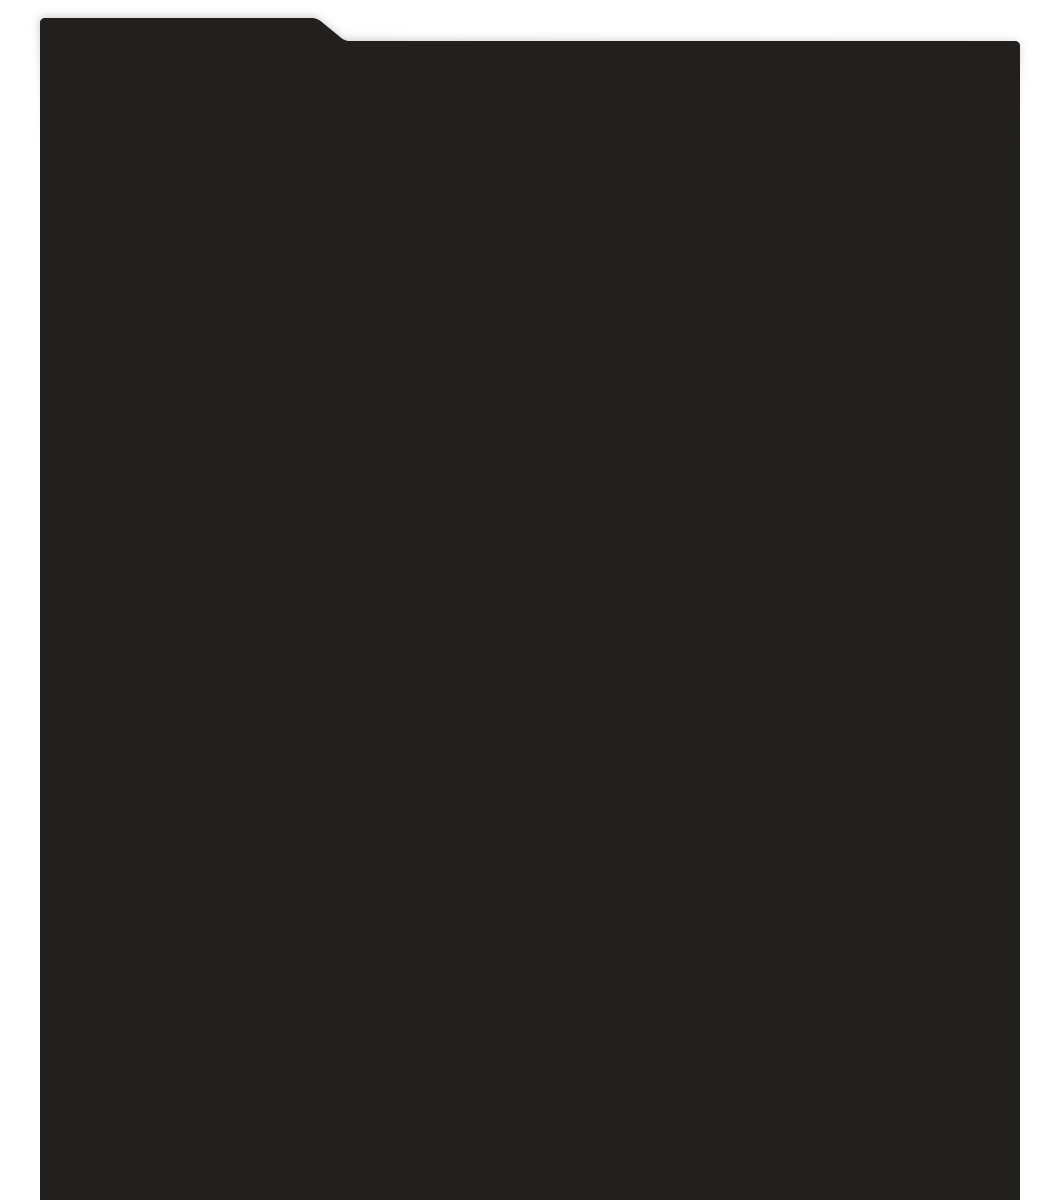
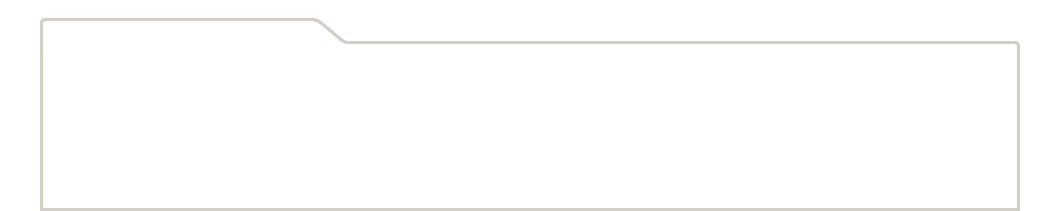
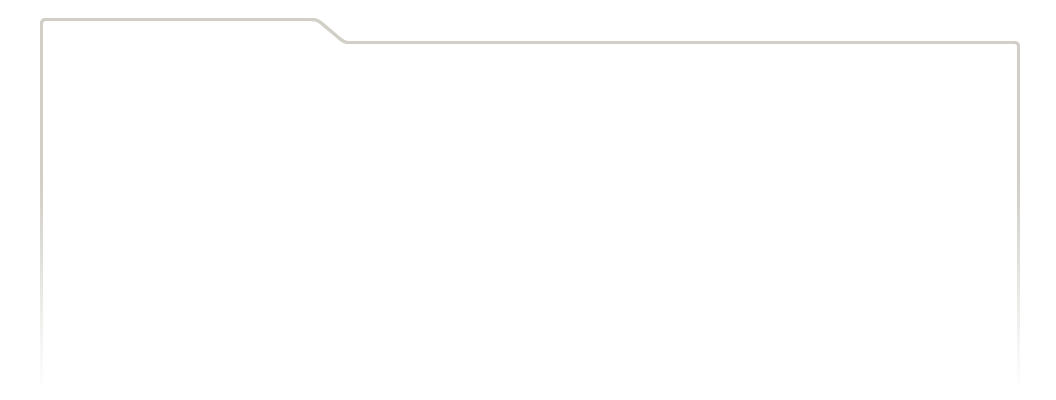
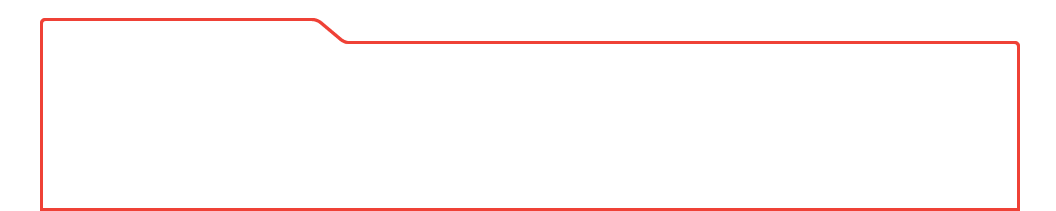
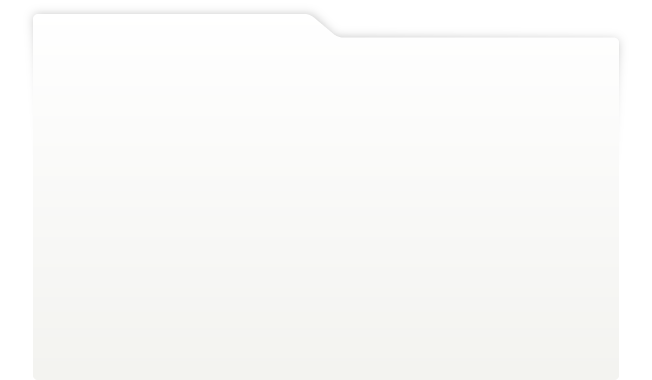
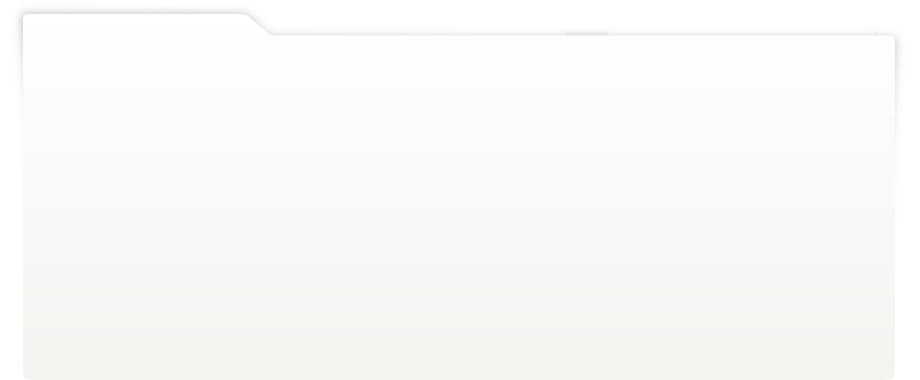
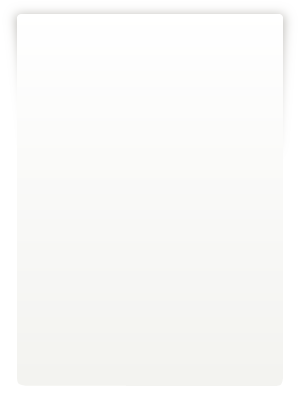
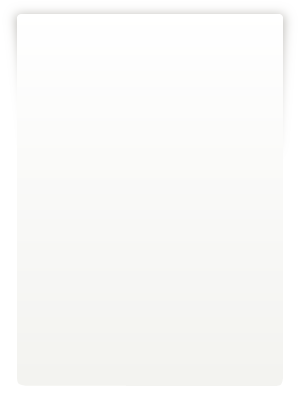
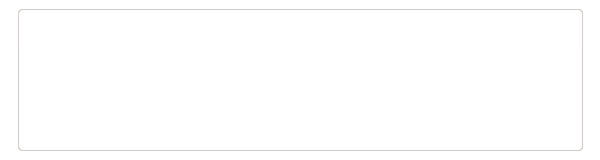
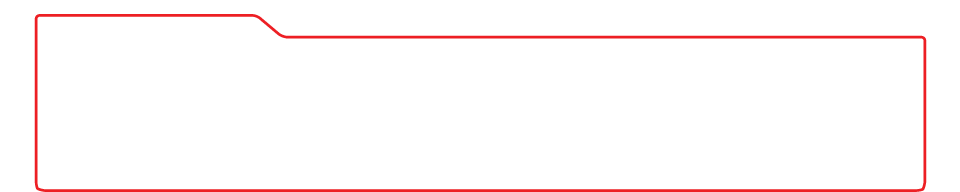
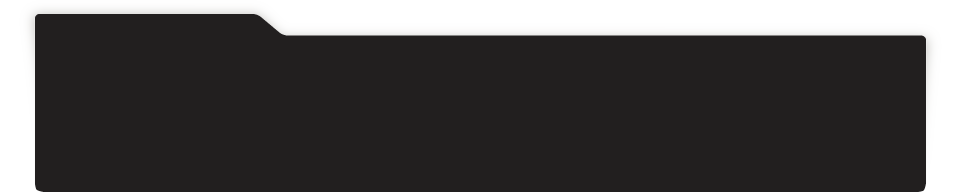
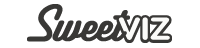
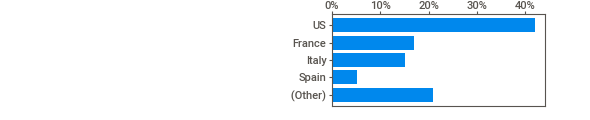
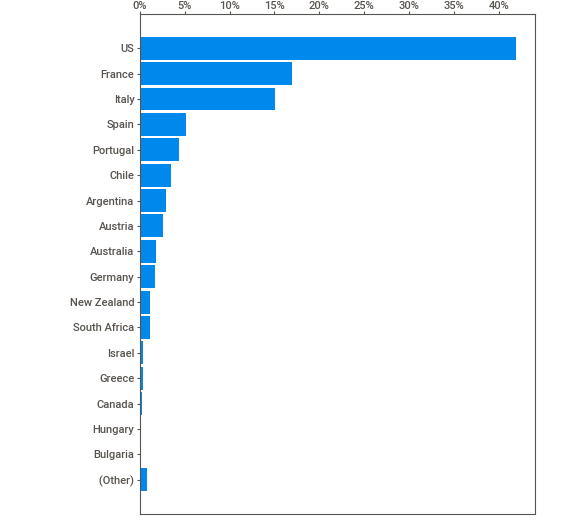
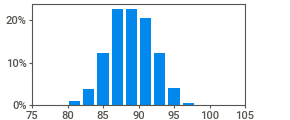
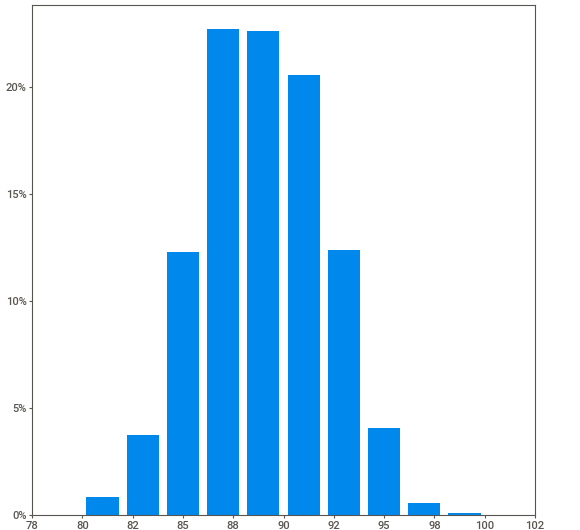
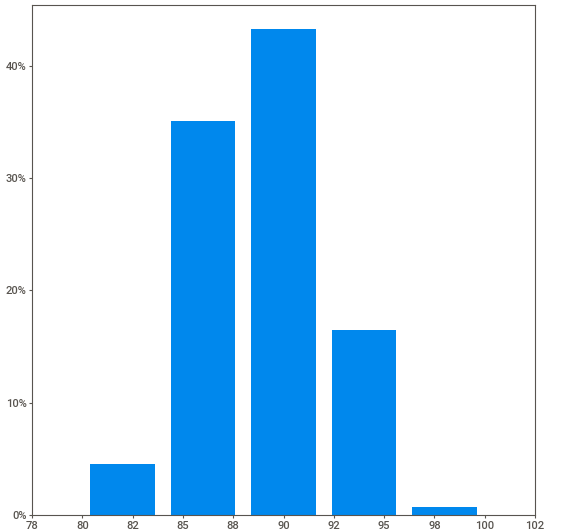
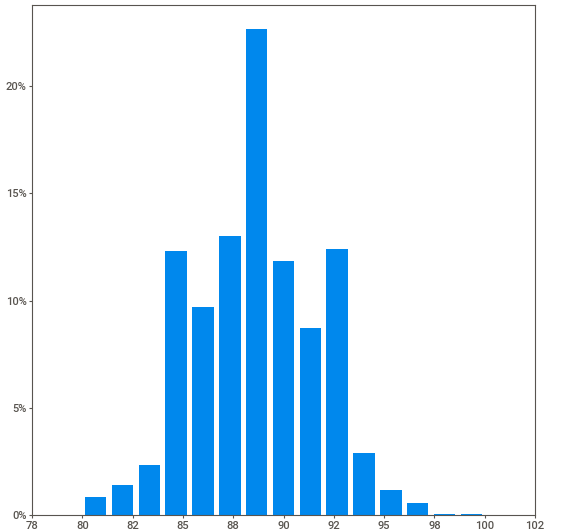
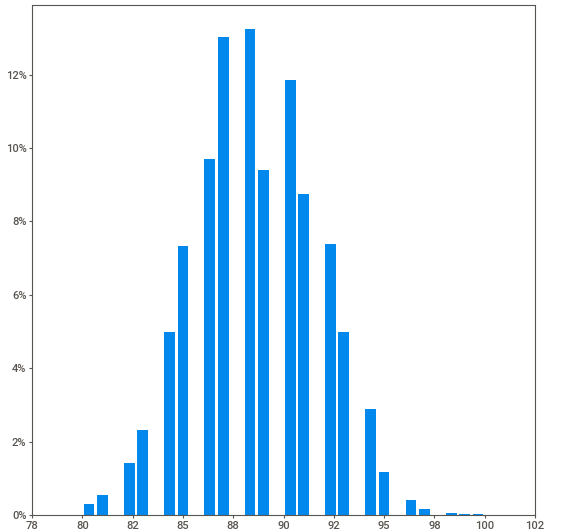
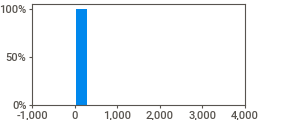
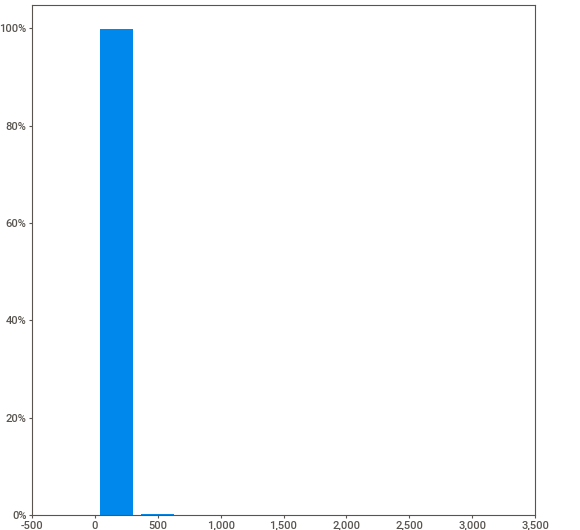
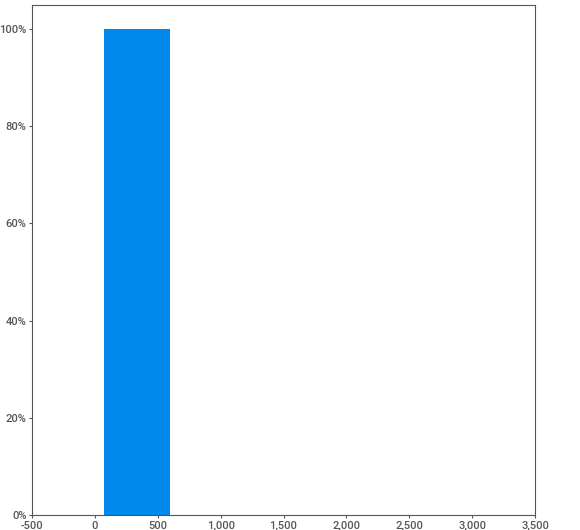
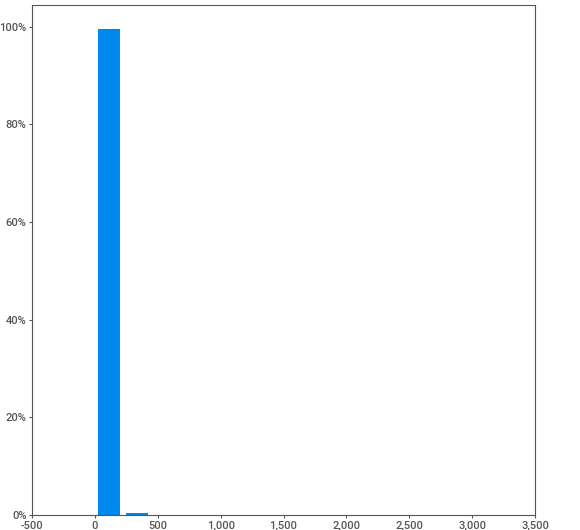
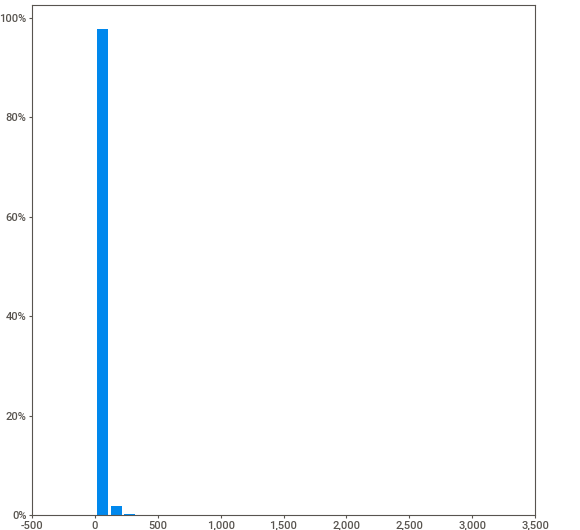
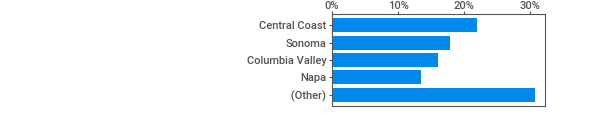
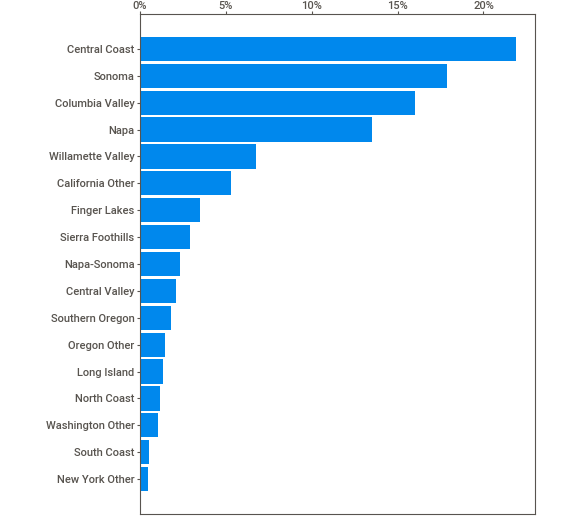
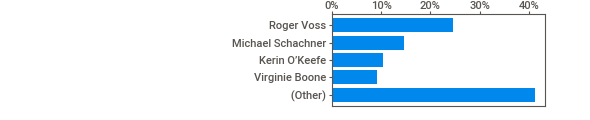
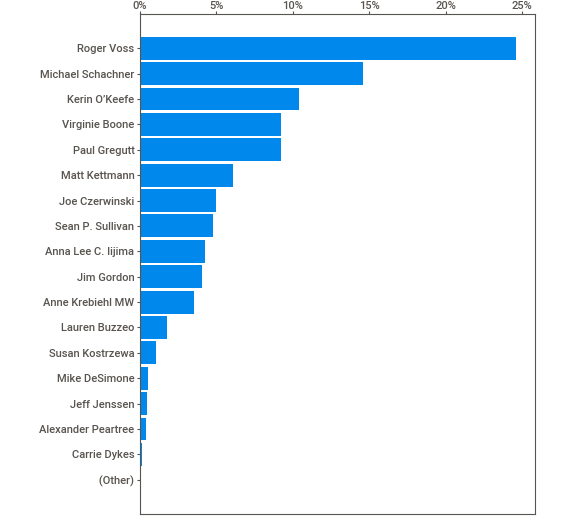
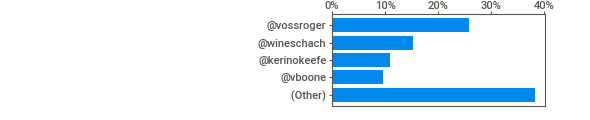
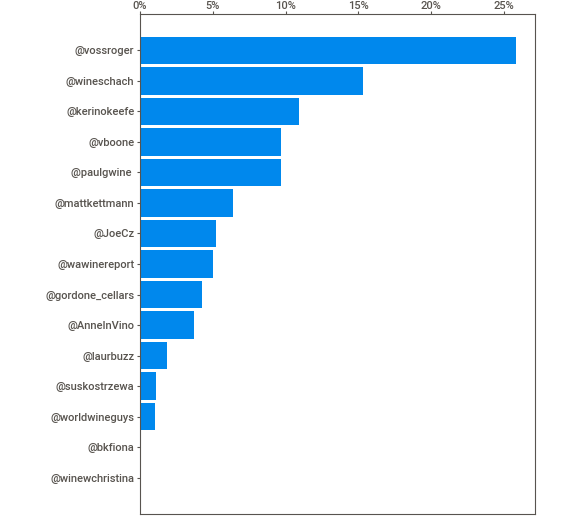
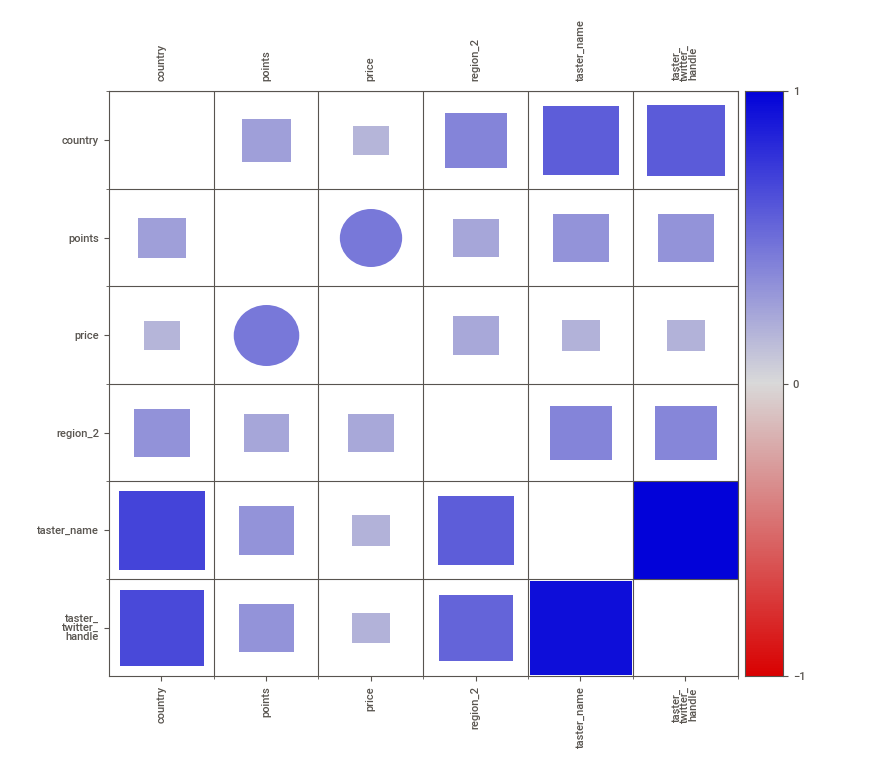
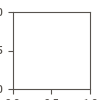

In [10]:
sv_report = sv.analyze(data)
sv_report.show_notebook()

In [11]:
dtale.show(data)

/home/alexey/anaconda3/lib/python3.9/site-packages/dtale/views.py:755: FutureWarning:

['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'variety'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



### Задание 5.2
Проанализируйте представленный датасет и перечислите все числовые признаки через запятую.

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
answer = ''.join(
    f'{variable}, '
    for variable in data.select_dtypes(include=numerics).columns
)
answer = answer[:-2]
print(answer)

points, price


### Задание 5.3
Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их.

В поле ниже введите, сколько дублирующихся записей вам удалось обнаружить.

In [13]:
data.duplicated().sum()

9983

In [14]:
missings = pd.DataFrame()

In [15]:
missings['cnt'] = data.isna().sum().sort_values()
missings['pct'] = missings.cnt / data.shape[0] * 100.0
display(missings)

,cnt,pct
description,0,0.000000
points,0,0.000000
title,0,0.000000
winery,0,0.000000
variety,1,0.000769
country,63,0.048472
province,63,0.048472
price,8996,6.921544
region_1,21247,16.347493
taster_name,26244,20.192197


### Задание 5.5
Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в модуле PYTHON-14. Очистка данных.

Воспользуйтесь правилами:

* Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных.
* Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
* Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.


In [16]:
data.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [17]:
data.describe(include='all')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37979,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

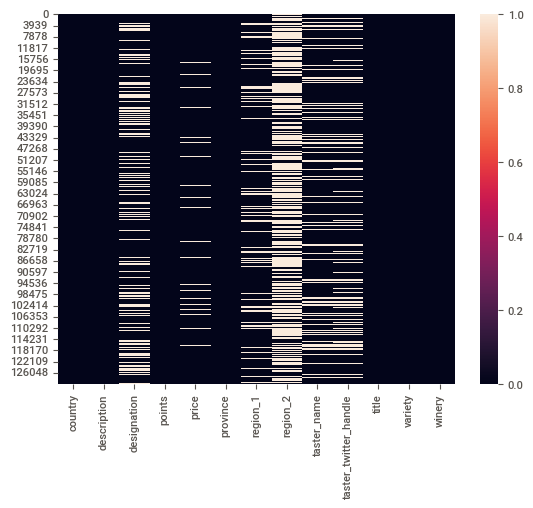

In [18]:
sns.heatmap(data.isnull()) # убеждаемся, что датасет без пропусков

In [19]:
# Как сделали авторы курса
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

data['designation'] = data['designation'].fillna('unknown')
data['region_1'] = data['region_1'].fillna('unknown')
data['taster_name'] = data['taster_name'].fillna('unknown')
data['taster_twitter_handle'] = data['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
data['country'] = data['country'].fillna('US')
data['price'] = data['price'].fillna(data['price'].mean())
data['province'] = data['province'].fillna('California')
data['variety'] = data['variety'].fillna('Pinot Noir')

In [23]:
# Как сделал я
# data.price.fillna(-1, inplace=True) # Вместо средней цены выделил такие моменты отрицательным значением
# data.variety.fillna('unknown', inplace=True) # Не стал заполнять самым часто встречающимся значением
# data.region_1.fillna('unknown', inplace=True) # Тут совпало
data = data.drop(axis='columns', labels=['region_2'])  # Тут совпало, но у меня осмысленные значения параметров (не просто циферки)
# data.taster_name.fillna('unknown', inplace=True) # Тут совпало
# data.taster_twitter_handle.fillna('unknown', inplace=True) # Тут совпало
# data.designation.fillna('unknown', inplace=True) # Тут совпало
# data.country.fillna('unknown', inplace=True) # Не стал заполнять самым часто встречающимся значением
# data.province.fillna('unknown', inplace=True) # Не стал заполнять самым часто встречающимся значением

<AxesSubplot: >

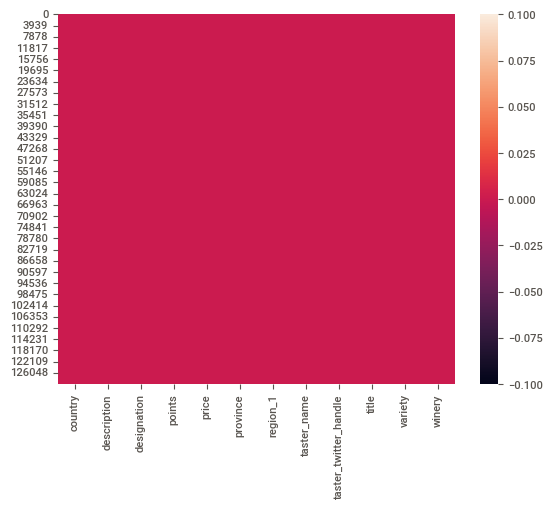

In [24]:
sns.heatmap(data.isnull()) # убеждаемся, что датасет без пропусков

In [25]:
output_path = join('dataset', 'output', 'wine_cleared.csv')

In [26]:
data.to_csv(output_path, index=False)